In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
from google.colab import files
uploaded = files.upload()

Saving dogpix.png to dogpix.png


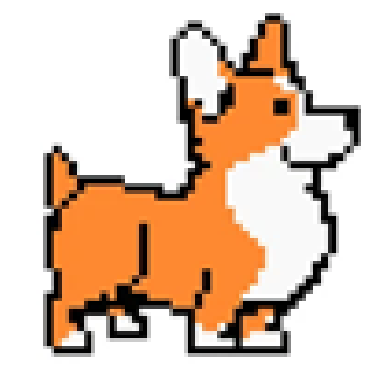

In [4]:
# Load the uploaded image
image_path = next(iter(uploaded.keys()))
img = cv2.imread(image_path)

# Convert the image from BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

# Get the shape of the image
height, width, _ = img_rgb.shape
# Convert the image to an array of RGB values
rgb_values = img_rgb.reshape(height, width, 3)

In [5]:
def softmax(Data):
    f = [i/sum([2.718281828459045**i for i in Data]) for i in [2.718281828459045**i for i in Data]]
    return [f,max(f)]

def convert(bias_square_value,customValue):
     a = [[1/(customValue**2) for _ in range (0,int(customValue))]for _ in range (0,int(customValue))]
     b = bias_square_value
     return a,b

def pixexc(im, row, col, size):
    # Ensure the row and column are within valid ranges
    max_row, max_col = im.shape[0] - 1, im.shape[1] - 1
    neighborhood = []
    # Calculate the half size of the neighborhood
    half_size = size // 2
    # Iterate over the neighborhood
    for r in range(row - half_size, row + half_size + 1):
        row_vals = []
        for c in range(col - half_size, col + half_size + 1):
            if 0 <= r <= max_row and 0 <= c <= max_col:
                row_vals.append(tuple(im[r, c]))
            else:
                row_vals.append((255, 255, 255))
        neighborhood.append(row_vals)
    return neighborhood

def display_image_from_colors(color_array):
    # Convert the list of lists of tuples into a NumPy array
    np_array = np.array(color_array, dtype=np.uint8)
    # Display the image
    plt.imshow(np_array)
    plt.axis('off')  # Hide the axes
    plt.show()

def avg(n_img,bias,sq_size):
  nars_pix = n_img
  red, green, blue = extract_rgb_values(nars_pix,sq_size)

  r_vect = (np.array(red)).reshape(sq_size**2)
  g_vect = (np.array(green)).reshape(sq_size**2)
  b_vect = (np.array(blue)).reshape(sq_size**2)

  bias_vect = bias.reshape(sq_size**2)

  r = np.dot(r_vect, bias_vect)
  g = np.dot(g_vect, bias_vect)
  b = np.dot(b_vect, bias_vect)


  return(r,g,b)


def load_and_resize_image(image_path, size=(height, width)):
    # Load the image
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Image at path '{image_path}' could not be loaded.")
    # Resize the image to the specified size
    img_resized = cv2.resize(img, size)
    # Convert the image from BGR to RGB
    img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
    return img_rgb

def extract_rgb_values(pixel_neighborhood,sq_size):
    red = []
    green = []
    blue = []
    for i in range(sq_size):
        for j in range(sq_size):
            r, g, b = pixel_neighborhood[i][j]
            red.append(r)
            green.append(g)
            blue.append(b)
    return red, green, blue

# Extract RGB values

In [7]:
# logic  ====>  r,g,b = (r1*B1+r2*B2+r3*B3+r4*B4z+r5*B5+r6*B6+r7*B7+r8*B8+r9*B9), (g1*B1+g2*B2+g3*B3+g4*B4+g5*B5+g6*B6+g7*B7+g8*B8+g9*B9), (b1*B1+b2*B2+b3*B3+b4*B4+b5*B5+b6*B6+b7*B7+b8*B8+b9*B9)
# bias = convert(3)

In [6]:

nabour_sqs = 7
if nabour_sqs//2 != 0 :
  nabour_sqs = nabour_sqs
else:
  nabour_sqs = nabour_sqs + 1
img_rgb = load_and_resize_image(image_path)
# Specify the row and column you want to fetch the neighborhood of
row, col = 70, 70
# Fetch and print the 3x3 pixel neighborhood
pixel_neighborhood = (np.array(pixexc(img_rgb, row, col,nabour_sqs)))
# print(pixel_neighborhood)
#display_image_from_colors(pixel_neighborhood)
#xtract_rgb_values(pixel_neighborhood,nabour_sqs)

In [8]:
custombias = [[1,1,1,1,1],
              [1,-3,-3,-3,1],
              [1,-3,-5,-3,1],
              [1,-3,-3,-3,1],
              [1,1,1,1,1]]

custombias = np.array(custombias)
custombias = custombias.reshape(custombias.size)
custombias = softmax(custombias)[0]
custombias = np.array(custombias)
custombias = custombias.reshape(int(np.sqrt(custombias.size)),int(np.sqrt(custombias.size)))
print(custombias)
blur_power = np.sqrt(custombias.size)

[[0.06192332 0.06192332 0.06192332 0.06192332 0.06192332]
 [0.06192332 0.00113417 0.00113417 0.00113417 0.06192332]
 [0.06192332 0.00113417 0.00015349 0.00113417 0.06192332]
 [0.06192332 0.00113417 0.00113417 0.00113417 0.06192332]
 [0.06192332 0.06192332 0.06192332 0.06192332 0.06192332]]


In [9]:
mean_image = []
for i in range(0,height):
    for j in range(0,width):
      pixel_neighborhood = pixexc(img_rgb, i, j, nabour_sqs)
      pixel_neighborhood_avg = avg(pixel_neighborhood,custombias,5)
      mean_image.append(pixel_neighborhood_avg)

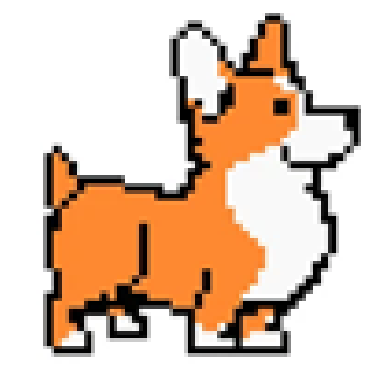

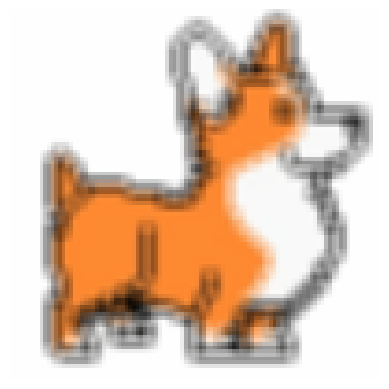

In [10]:
final_image = ((np.array(mean_image)).reshape(height, width, 3))
display_image_from_colors(rgb_values)
display_image_from_colors(final_image)
